In [1]:
import logging.config
import os.path as op

import yaml

from agents import GreedyAgent
from agents.matchmanager import MatchManager
from agents.ml.classifier import ClassifierAgent
from agents.ml.regression import RegressionAgent
from core.game.state import vectorStateInfo, vectorState, vectorActionInfo, vectorAction
from core.const import RED, BLUE
from scenarios import scenarioJunction

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

%matplotlib inline

In [2]:
with open(op.join('.', 'logger.config.yaml'), 'r') as stream:
    config = yaml.load(stream, Loader=yaml.FullLoader)
logging.config.dictConfig(config)

In [28]:
red_models = [
    ('gre', ''),
    ('cls', 'models/Junction_RandomForestClassifier_red_20210216.joblib'),
    ('cls', 'models/Junction_RandomForestClassifier_20210216.joblib'),
    ('reg', 'models/Junction_RandomForestRegressor_red_20210216.joblib'),
    ('reg', 'models/Junction_RandomForestRegressor_20210216.joblib')
]
blue_models = [
    ('gre', ''),
    ('cls', 'models/Junction_RandomForestClassifier_blue_20210216.joblib'),
    ('cls', 'models/Junction_RandomForestClassifier_20210216.joblib'),
    ('reg', 'models/Junction_RandomForestRegressor_blue_20210216.joblib'),
    ('reg', 'models/Junction_RandomForestRegressor_20210216.joblib')
]

In [29]:
def regression(team:str, path:str, seed:int):
    return RegressionAgent(team, path, seed=seed)

def classifier(team:str, path:str, seed:int):
    return ClassifierAgent(team, path, seed=seed)

def greedy(team:str, seed:int):
    return GreedyAgent(team, seed=seed)

In [30]:
def gameJunction(seed:int, red:tuple, blue:tuple) -> MatchManager:
    board, state = scenarioJunction()
    
    playerRed, playerBlue = None, None

    if red[0] == 'gre':
        playerRed = greedy(RED, seed)
    if red[0] == 'cls':
        playerRed = classifier(RED, red[1], seed)
    if red[0] == 'reg':
        playerRed = regression(RED, red[1], seed)
    
    if blue[0] == 'gre':
        playerBlue = greedy(BLUE, seed)
    if blue[0] == 'cls':
        playerBlue = classifier(BLUE, blue[1], seed)
    if blue[0] == 'reg':
        playerBlue = regression(BLUE, blue[1], seed)
    
    mm = MatchManager(' ', playerRed, playerBlue, board, state, seed=seed)
    while not mm.end:
        mm.nextStep()
    
    return mm

In [6]:
seed = 51

In [7]:
MM_RR = gameJunction(seed, red_models[])

2021-02-16 16:54:43 INFO SCENARIO: Junction
2021-02-16 16:54:43 INFO SEED:     51
2021-02-16 16:54:44 INFO blue : placed his troops in [ 39 147  99] (7.855555555555553)
2021-02-16 16:54:44 INFO ====================================================================================================
2021-02-16 16:54:44 INFO Turn 0
2021-02-16 16:54:44 INFO red   action   : RED  : rInf4     : Pass 
2021-02-16 16:54:44 INFO blue  action   : BLUE : bInf1     : Moved to (35, 35) 
2021-02-16 16:54:44 INFO red   response : RED  : rInf3     : Attack bInf1 with Mortar in response (0 [18]/5): shell missed and hit (2, -1): 0 hit
2021-02-16 16:54:44 INFO red   action   : RED  : rInf3     : Moved to (18, 33) 
2021-02-16 16:54:44 INFO blue  response : BLUE : bInf2     : Attack rInf3 with Mortar in response (0 [9]/5): shell missed and hit (0, 2): 0 hit
2021-02-16 16:54:44 INFO blue  action   : BLUE : bInf2     : Attack rInf3 with Mortar success=(1 [1]/17) target=(0/4) KILLED!
2021-02-16 16:54:44 INFO red  

In [8]:
MM_CC = gameJunctionClassifierClassifier(seed)

2021-02-16 16:54:48 INFO SCENARIO: Junction
2021-02-16 16:54:48 INFO SEED:     51
2021-02-16 16:54:49 INFO blue : placed his troops in [ 39 147  99] (7.855555555555553)
2021-02-16 16:54:49 INFO ====================================================================================================
2021-02-16 16:54:49 INFO Turn 0
2021-02-16 16:54:49 INFO red   action   : RED  : rTank3    : Moved to (18, 31) 
2021-02-16 16:54:49 INFO blue  response : BLUE :: Pass in response 
2021-02-16 16:54:49 INFO blue  action   : BLUE : bInf2     : Pass 
2021-02-16 16:54:49 INFO red   action   : RED  : rInf3     : Moved to (18, 33) 
2021-02-16 16:54:49 INFO blue  response : BLUE :: Pass in response 
2021-02-16 16:54:49 INFO blue  action   : BLUE : bInf1     : Pass 
2021-02-16 16:54:49 INFO red   action   : RED  : rInf4     : Pass 
2021-02-16 16:54:49 INFO blue  action   : BLUE : bAPC1     : Attack rInf3 with Machine gun 
2021-02-16 16:54:49 INFO red   exception: No response given
2021-02-16 16:54:49 INFO

In [9]:
MM_GG = gameJunctionGreedyGreedy(seed)

2021-02-16 16:54:56 INFO SCENARIO: Junction
2021-02-16 16:54:56 INFO SEED:     51
2021-02-16 16:54:56 INFO red  : choose positions color darkred
2021-02-16 16:54:56 INFO blue : placed his troops in [ 39 147  99] (7.855555555555553)
2021-02-16 16:54:56 INFO ====================================================================================================
2021-02-16 16:54:56 INFO Turn 0
2021-02-16 16:54:57 INFO red   action   : RED  : rTank3    : Moved to (25, 33) 
2021-02-16 16:54:57 INFO blue  response : BLUE :: Pass 
2021-02-16 16:54:57 INFO blue  action   : BLUE : bInf1     : Attack rTank3 with Anti-tank weapon success=(1 [9]/16) target=(0/1) KILLED!
2021-02-16 16:54:57 INFO red   response : RED  :: Pass 
2021-02-16 16:54:57 INFO red   action   : RED  : rInf3     : Moved to (20, 34) 
2021-02-16 16:54:57 INFO blue  response : BLUE :: Pass 
2021-02-16 16:54:58 INFO blue  action   : BLUE : bAPC1     : Moved to (30, 26) 
2021-02-16 16:54:58 INFO red   response : RED  :: Pass 
2021-02-1

In [10]:
MM_RR.winner, MM_CC.winner, MM_GG.winner

('blue', 'blue', 'blue')

In [11]:
def categoryAction(a):
    return {
        'PassTeam': 0.5,
        'PassFigure': 0.5,
        'Move': 0.75,
        'Attack': 1.0,
        'AttackRespond': 0.25,
        'PassRespond': 0.0,
    }[a]
    
    if a == 'Move':
        return 1.0
    if a == 'Attack':
        return 0.5
    if a == 'Attack':
        return 0.5
    return 0

def prepareDataFrames(MM):
    df_states = pd.DataFrame(
        columns=vectorStateInfo(),
        data=[vectorState(x) for x in MM.states_history]
    )

    df_actions = pd.DataFrame(
        columns=vectorActionInfo(),
        data=[vectorAction(x) for x in MM.actions_history]
    )
    df_red = MM.red.createDataFrame()
    df_blue = MM.blue.createDataFrame()
    
    df_red = df_red.set_index('count')
    df_blue = df_blue.set_index('count')

    return df_red, df_blue

In [12]:
df_red_rr, df_blue_rr = prepareDataFrames(MM_RR)
df_red_cc, df_blue_cc = prepareDataFrames(MM_CC)
df_red_gg, df_blue_gg = prepareDataFrames(MM_GG)

In [13]:
df_rr = pd.concat([df_red_rr, df_blue_rr]).set_index('time').sort_index()
df_cc = pd.concat([df_red_cc, df_blue_cc]).set_index('time').sort_index()
df_gg = pd.concat([df_red_gg, df_blue_gg]).set_index('time').sort_index()

# Plots

In [14]:
lines = {
    'PassFigure': 0.5,
    'Move': 0.75,
    'Attack': 1.0,
    'AttackRespond': 0.25,
    'PassRespond': 0.0,
}

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,4)

In [16]:
def plotEntropy(df, color:str):
    df.score.plot(color=color, marker='o')
    df.entropy.plot(color='purple')

    for i, row in df[['score','action']].reset_index().iterrows():
        plt.annotate(row.action, (row['count'], row.score), ha='center', rotation=90, textcoords="offset points", xytext=(0,10))

In [17]:
def plotContrast(df):
    df[df['team']=='red']['entropy'].plot(color='red'), df[df['team']=='blue']['entropy'].plot(color='blue')

# Regressions

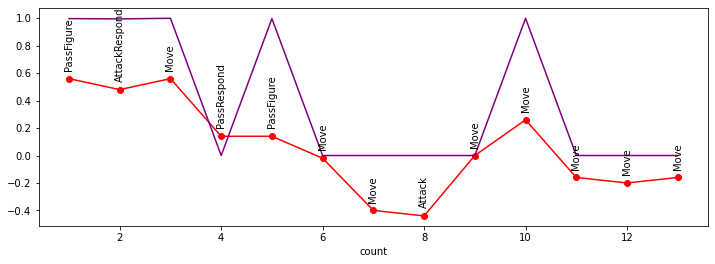

In [18]:
plotEntropy(df_red_rr, 'red')

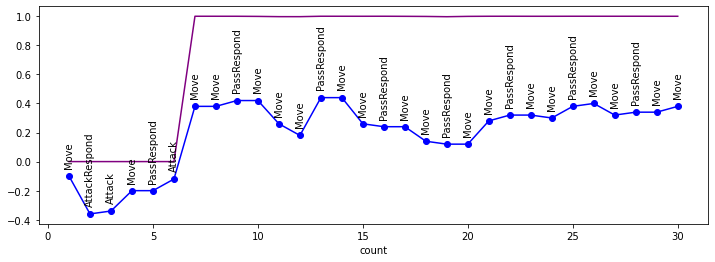

In [19]:
plotEntropy(df_blue_rr, 'blue')

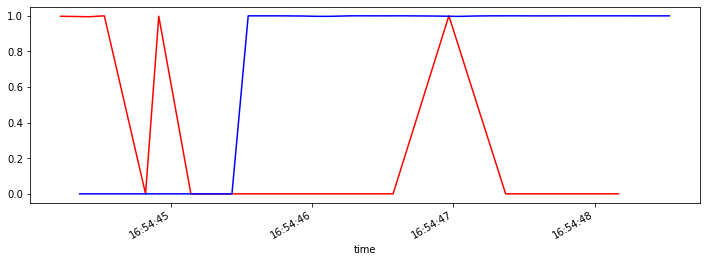

In [20]:
plotContrast(df_rr)

# Classifiers

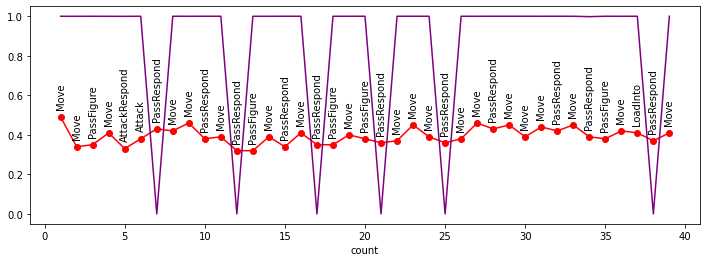

In [21]:
plotEntropy(df_red_cc, 'red')

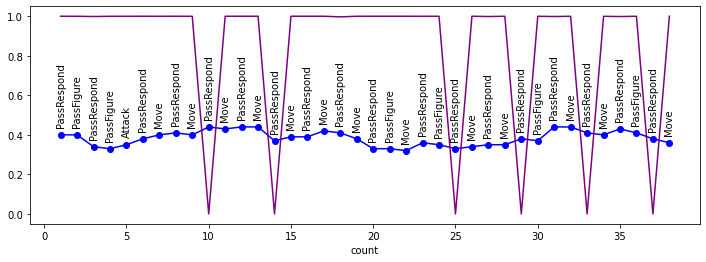

In [22]:
plotEntropy(df_blue_cc, 'blue')

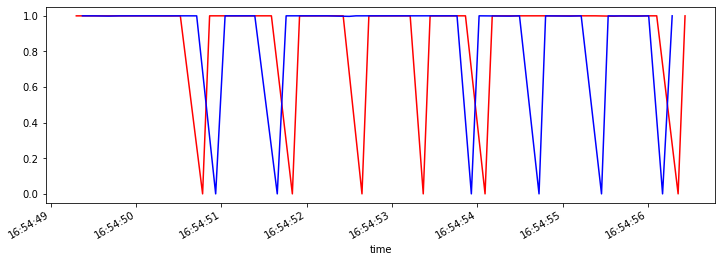

In [23]:
plotContrast(df_cc)

# Greedy

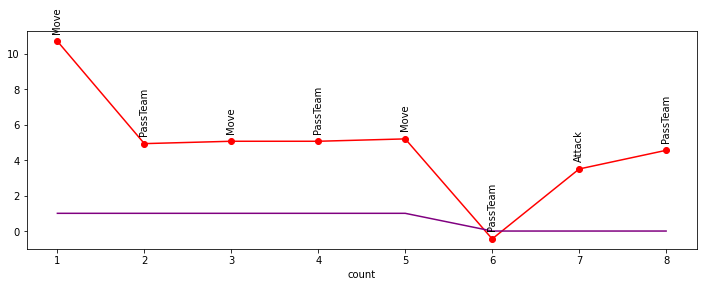

In [24]:
plotEntropy(df_red_gg, 'red')

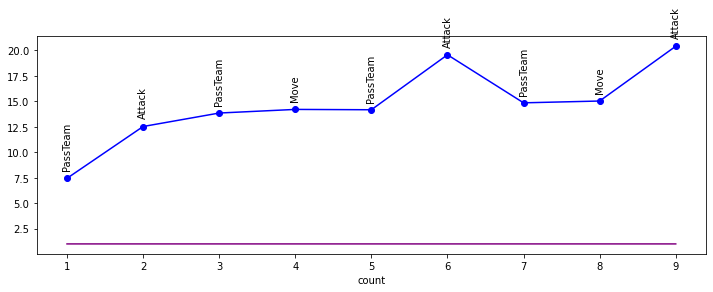

In [25]:
plotEntropy(df_blue_gg, 'blue')

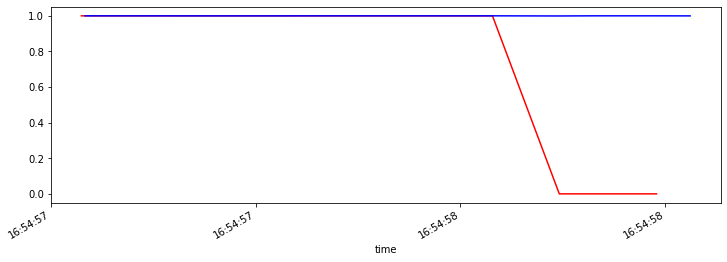

In [26]:
plotContrast(df_gg)